In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

os.chdir(r'/content/gdrive/MyDrive/Студвесна 2023')
print(os.getcwd())

/content/gdrive/MyDrive/Студвесна 2023


In [ ]:
df = pd.read_csv('Physical_Activity_Monitoring_unlabeled.csv.zip')

In [ ]:
df1 = df.copy()
df1

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.54470,27.3336,-5.766200,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.82570,-15.7719,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.81710,16.3089,25.292800,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.74180,34.3566,21.327400,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.77980,-3.9981,10.995000,0.171133,-0.748343,0.252988,-0.588807,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3479.53,33.8750,-9.084250,4.70122,2.890170,-9.689610,6.78077,3.975430,-0.157406,0.774189,...,0.424520,-0.856836,-25.00990,-23.5557,23.615300,0.318171,-0.701921,0.555778,-0.311745,5
534597,2448.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.767710,-3.050980,-35.70240,31.8018,16.421800,0.435887,0.660643,0.371665,0.485200,5
534598,2479.84,34.6875,-6.367550,2.32131,2.207640,-6.362460,2.33049,2.607610,0.206349,-0.359415,...,-0.034144,-0.402013,-49.69220,20.6039,-0.917908,0.561652,0.297957,0.756767,0.151899,5
534599,3437.82,28.0625,5.461940,10.43640,-9.073300,8.348860,5.76518,-6.143210,3.543910,2.757300,...,0.352062,-5.577750,-34.15510,-11.0786,39.737500,0.062163,-0.798705,-0.056668,-0.595815,6


In [ ]:
array = df1.isna().sum()
cols = np.array(array[array > 0].index)
cols

array(['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
       'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2',
       'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1',
       'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
       'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1',
       'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2',
       'ankleMagne3', 'ankleOrientation1', 'ankleOrientation2',
       'ankleOrientation3', 'ankleOrientation4'], dtype=object)

In [ ]:
for i in cols:
    df1[i].fillna(df1[i].mean(), inplace=True)

In [ ]:
inertia_df = pd.DataFrame(data=[], index=range(3, 12), columns=['inertia'])

for n_clusters in range(3, 8):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(df1)

    # silhouette_avg = silhouette_score(df1, cluster_labels)
    # print(
    #     "For n_clusters =",
    #     n_clusters,
    #     "The average silhouette_score is :",
    #     silhouette_avg,
    # )

    # sample_silhouette_values = silhouette_samples(df1, cluster_labels)
    # print(
    #     "For n_clusters =",
    #     n_clusters,
    #     "The average silhouette_score is :",
    #     sample_silhouette_values,
    # )
    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

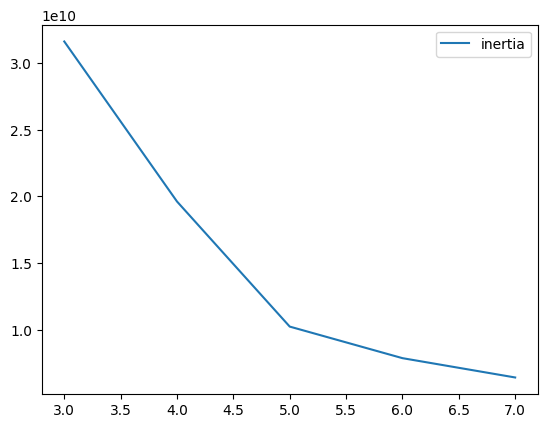

In [ ]:
inertia_df.plot()

In [ ]:
n_clusters = 4

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(df1)

# inertia
inertia = clusterer.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import colorsys
N = n_clusters
HSV_tuples = [(x*1.0/N, 0.7, 0.8) for x in range(N)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

print(RGB_tuples)
print(set(cluster_labels))

{0, 1, 2, 3}


In [ ]:
dct1 = dict(zip(set(cluster_labels), RGB_tuples))
dct1

{0: (0.8, 0.24000000000000005, 0.24000000000000005),
 1: (0.52, 0.8, 0.24000000000000005),
 2: (0.24000000000000005, 0.8, 0.8),
 3: (0.52, 0.24000000000000005, 0.8)}

(53460, 53)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


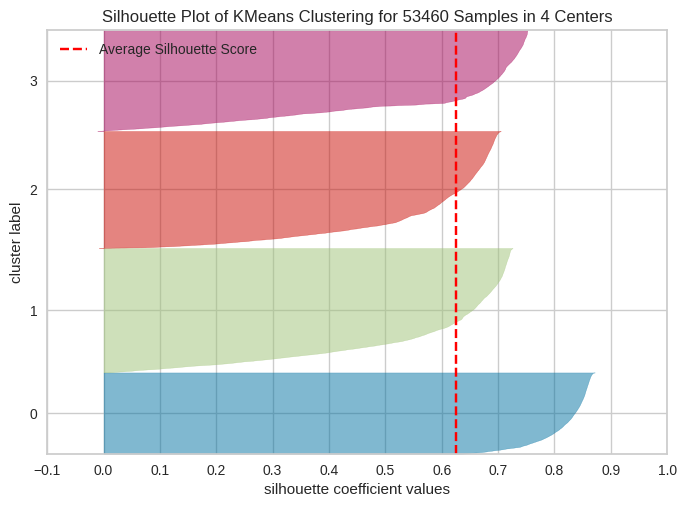

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 53460 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=42))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

X = df1.sample(frac=0.1)
print(X.shape)
silhouette_visualizer(KMeans(n_clusters, random_state=42), X, colors='yellowbrick')

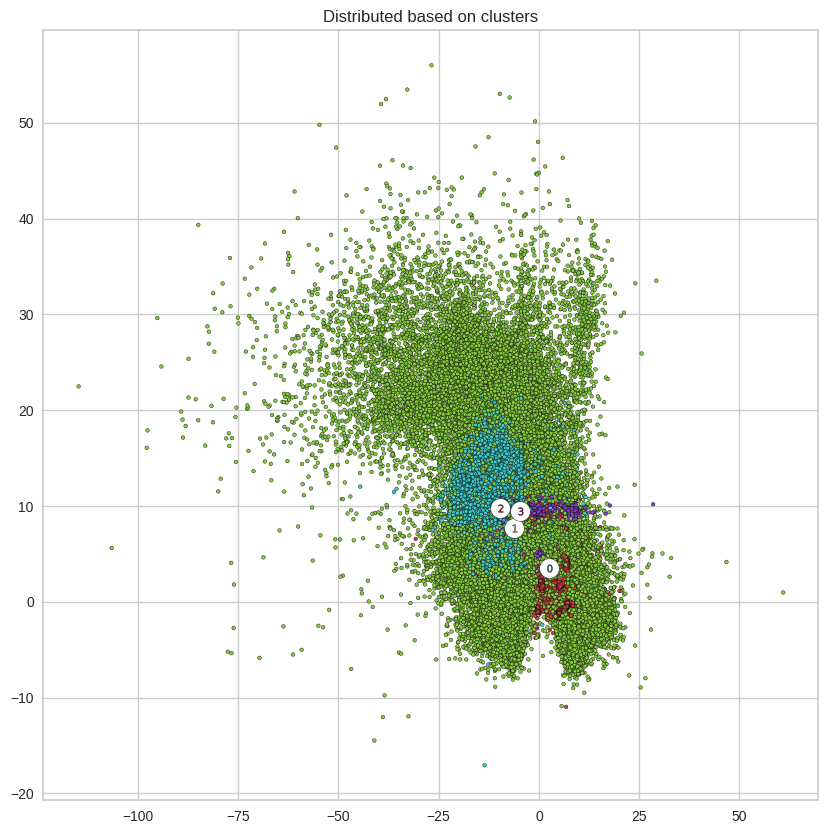

In [ ]:
plt.figure(figsize=(10,10))
num1, num2 = 2, 20
plt.scatter(df1.iloc[:, num1], df1.iloc[:, num2], s=7, c=[dct1[i] for i in cluster_labels], edgecolor='k')

centers = clusterer.cluster_centers_

plt.scatter(centers[:, num1], centers[:, num2], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[num1], c[num2], marker='$%d$' % i, alpha=1,
                s=30, edgecolor='k')

plt.title("Distributed based on clusters");

In [ ]:
arr = []
for i in cluster_labels:
    if i not in arr:
        arr.append(i)
    if len(arr) == n_clusters:
        break

In [ ]:
arr

[0, 1, 3, 2]

In [ ]:
dct = dict(zip(arr, range(1, n_clusters + 1)))
dct

{0: 1, 1: 2, 3: 3, 2: 4}

In [ ]:
predict = pd.DataFrame(zip(cluster_labels, np.array([dct[i] for i in cluster_labels])), columns=['old', 'activityID'])
predict

,old,activityID
0,0,1
1,1,2
2,3,3
3,1,2
4,0,1
...,...,...
534596,1,2
534597,2,4
534598,2,4
534599,1,2


In [ ]:
#predict['activityID'].to_csv('predict.csv')